# <u><b> Objective </b></u>
## <b>Build a recommender system which would recommend the 5 most similar movies to a movie query. </b>

### Suppose you are working at IMDB and you want to find out which movies are similar to a given movie. We can use kNN algorithm to identify the most similar movies. In the given dataset, we are given a lot of information about a particular movie. We need to restrict ourselves to the columns, Movie ID, Movie Name, IMDB Rating and binary indicators of different genres.

### A sample dataset might look like :





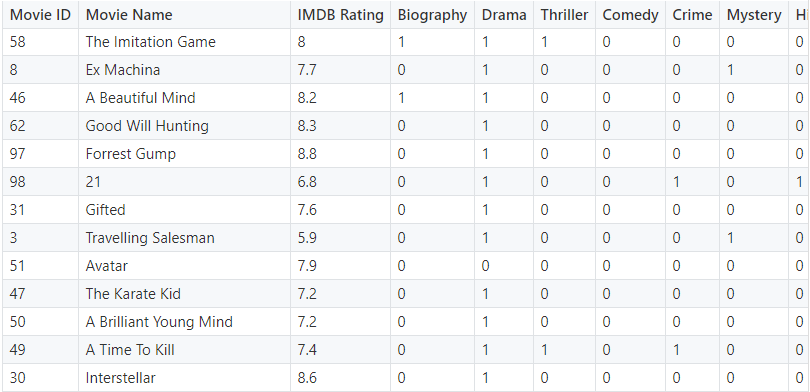

### You can keep all the genres indicators as columns. Suppose in the column genres, you have 20 distinct genres then you will create 20 different indicators.

### Also you need to take any 1000 movies in your train dataset and 10 movies in your test corresponding to which you need to print the 5 most similar movies since kNN becomes computationally intensive as the number of observations increases.

In [ ]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import json
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [ ]:
path  = '/content/mydrive/MyDrive/Dataset/imdb_data.csv'
movie_df = pd.read_csv(path)
# movie_df.head().T

In [ ]:
# test_str = movie_df['genres'][1]
# res = list(eval(test_str))
# res

In [ ]:
cols = ['id', 'title', 'genres', 'popularity']
df = movie_df[cols]

#### **Create a list of genres of movies from genre column**

In [ ]:
def get_genre(x):
  try:
    genre = []
    ls = ast.literal_eval(x)
    for each in ls:
      genre.append(each['name'])
    return genre

  except:
        return []

# testing above function
# print(get_genre(df['genres'][1]))

df['genre_name'] = df['genres'].map(get_genre)

<ipython-input-170-a2017155b739>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_name'] = df['genres'].map(get_genre)


#### **Convert the genre list into binary matrix stored in sparse format**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
x = df['genre_name']
mlb = MultiLabelBinarizer(sparse_output = True)         # sparse_output = True -> This will store the matrix in sparse format
y = mlb.fit_transform(x)

In [ ]:
mlb_df = pd.DataFrame.sparse.from_spmatrix(y, columns = mlb.classes_)          # converting the sparse matrix to pandas dataframe
df = df.join(mlb_df)
df.drop(columns = ['genres', 'genre_name'], axis = 1, inplace = True)
df.T

<ipython-input-172-eeec4998d6fd>:4: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  df.T


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
id,1,2,3,4,5,6,7,8,9,10,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,Marine Boy,Pinocchio and the Emperor of the Night,The Possession,Control Room,Muppet Treasure Island,A Mighty Wind,...,B.A.P.S.,Save the Last Dance,The Thief of Bagdad,The Terminal,School Ties,Chasers,We Are the Best!,The Long Kiss Goodnight,Along Came Polly,Abduction
popularity,6.575393,8.248895,64.29999,3.174936,1.14807,0.743274,7.286477,1.949044,6.902423,4.672036,...,1.56098,4.794088,3.878515,14.092373,7.438381,9.85327,3.727996,14.482345,15.725542,10.512109
Action,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
Adventure,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Animation,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,0,1,0,0,1,0
Crime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Documentary,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Drama,0,1,1,1,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,0,0


#### **Lets see the count of each type of genre**

In [ ]:
genre_count = df.drop(['id','popularity'],axis=1).sum(numeric_only=True).sort_values(ascending = False)
genre_count

Drama              1531
Comedy             1028
Thriller            789
Action              741
Romance             571
Crime               469
Adventure           439
Horror              301
Science Fiction     290
Family              260
Fantasy             232
Mystery             225
Animation           141
History             132
Music               100
War                 100
Documentary          87
Western              43
Foreign              31
TV Movie              1
dtype: int64

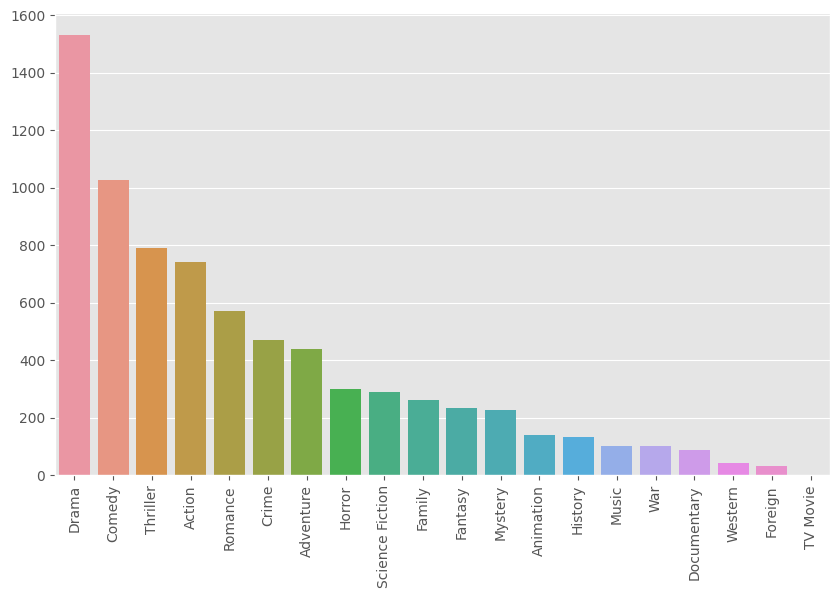

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = genre_count.index, y = genre_count)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head().T

<ipython-input-175-249d5b38dd77>:1: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  df.head().T


,0,1,2,3,4
id,1,2,3,4,5
title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,Marine Boy
popularity,6.575393,8.248895,64.29999,3.174936,1.14807
Action,0,0,0,0,1
Adventure,0,0,0,0,0
Animation,0,0,0,0,0
Comedy,1,1,0,0,0
Crime,0,0,0,0,0
Documentary,0,0,0,0,0
Drama,0,1,1,1,0


#### **Training the dataset using K-nearest neighbour**

In [ ]:
X=df.set_index('title')
X.drop(columns='id',inplace=True)
X.T

title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,Marine Boy,Pinocchio and the Emperor of the Night,The Possession,Control Room,Muppet Treasure Island,A Mighty Wind,...,B.A.P.S.,Save the Last Dance,The Thief of Bagdad,The Terminal,School Ties,Chasers,We Are the Best!,The Long Kiss Goodnight,Along Came Polly,Abduction
popularity,6.575393,8.248895,64.29999,3.174936,1.14807,0.743274,7.286477,1.949044,6.902423,4.672036,...,1.56098,4.794088,3.878515,14.092373,7.438381,9.85327,3.727996,14.482345,15.725542,10.512109
Action,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000
Adventure,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Animation,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Comedy,1.000000,1.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000
Crime,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
Documentary,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Drama,0.000000,1.000000,1.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000
Family,0.000000,1.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Fantasy,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [ ]:
from scipy.sparse import csr_matrix
df_matrix = csr_matrix(X.values)

from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(X.shape[0])
print(query_index)
movie_query = np.array(X.iloc[query_index,:].values).reshape(1, -1)
movie_query

2667


array([[12.061521,  0.      ,  0.      ,  0.      ,  1.      ,  1.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ]])

In [ ]:
distance, indices = model_knn.kneighbors(movie_query, n_neighbors = 6)

In [ ]:
print(indices, distance)

[[2667   13 2402  146  697  170]] [[1.11022302e-16 5.93576465e-05 9.48438873e-05 2.00150946e-04
  6.98653939e-04 7.51653860e-04]]


In [ ]:
X.index[indices.flatten()[0]]

'The Whole Nine Yards'

In [ ]:
for i in range(0, len(distance.flatten())):
  if i == 0:
    print('Recommendations for {0}:\n'.format(X.index[indices.flatten()[i]]))
  else:
    print('{0}: {1} ,with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distance.flatten()[i]))

Recommendations for The Whole Nine Yards:

1: Be Cool ,with distance of 5.93576464980039e-05:
2: Starsky & Hutch ,with distance of 9.484388733749238e-05:
3: Police Academy 5: Assignment Miami Beach ,with distance of 0.0002001509462847828:
4: Life of Crime ,with distance of 0.0006986539388129653:
5: Police Academy 2: Their First Assignment ,with distance of 0.0007516538601285427:


In [ ]:
# Lets check for this test data
X_test = df[500:510].set_index('title')
X_test.drop(columns='id',inplace=True)

In [ ]:
test_movies_list = test_movie=X_test.index.tolist()

In [ ]:
# testing
# for movie_name in test_movies_list:
#   print(X.loc[movie_name])

In [ ]:
for movie_name in test_movies_list:
  movie_query = np.array(X.loc[movie_name].values).reshape(1, -1)
  distance, indices = model_knn.kneighbors(movie_query, n_neighbors = 6)
  for i in range(0, len(distance.flatten())):
    if i == 0:
      print('Recommendations for {0}:\n'.format(X.index[indices.flatten()[i]]))
    else:
      print('{0}: {1} ,with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distance.flatten()[i]))

Recommendations for Army of Shadows:

1: The Deer Hunter ,with distance of 5.18564577278724e-06:
2: Innocent Voices ,with distance of 2.5936810700510904e-05:
3: The Caine Mutiny ,with distance of 0.00023938254167454875:
4: The Water Diviner ,with distance of 0.000502889559864439:
5: Jarhead ,with distance of 0.0006922693489184173:
Recommendations for Elizabethtown:

1: Juno ,with distance of 6.316643685888579e-08:
2: Manhattan ,with distance of 3.7490912725424153e-06:
3: 10 Things I Hate About You ,with distance of 4.387836787800303e-06:
4: The Artist ,with distance of 1.1325571763642905e-05:
5: From Prada to Nada ,with distance of 4.3708805131825734e-05:
Recommendations for Good Kill:

1: Cell 211 ,with distance of 2.3395868605891046e-05:
2: Crimson Tide ,with distance of 2.4331760583806705e-05:
3: Breakdown ,with distance of 5.717556962303583e-05:
4: Airport ,with distance of 7.336196250751215e-05:
5: The Last Castle ,with distance of 0.0004390637921811713:
Recommendations for Clocke